In [7]:


# Perform k-fold cross-validation
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

# Load and preprocess data
df = pd.read_csv('../../data/ST001937_bm.csv')

# Separate features and labels
X = df.drop('Phenotypes', axis=1)
y = df['Phenotypes']

accuracy: 0.825
accuracy: 0.7583333333333333
accuracy: 0.8333333333333334
accuracy: 0.775
accuracy: 0.8333333333333334


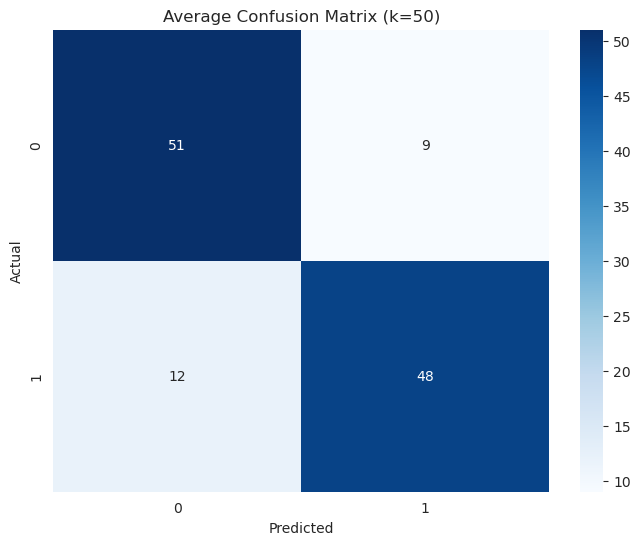

accuracy: 0.8333333333333334
accuracy: 0.75
accuracy: 0.825
accuracy: 0.775
accuracy: 0.825


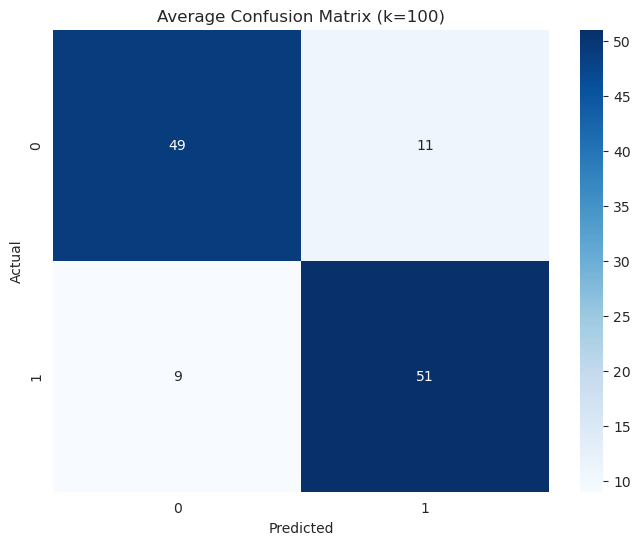

accuracy: 0.825
accuracy: 0.7583333333333333
accuracy: 0.8333333333333334
accuracy: 0.775
accuracy: 0.8


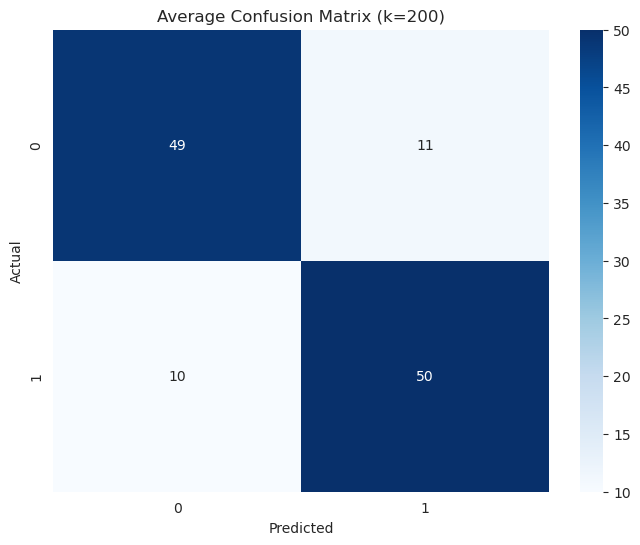

In [8]:

# Perform k-fold cross-validation and visualize results
for k in [50, 100, 200]:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []
    conf_matrices = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        rf_clf = RandomForestClassifier(n_estimators=k, random_state=42)
        rf_clf.fit(X_train, y_train)

        y_pred = rf_clf.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        print('accuracy:', accuracy_score(y_test, y_pred))
        conf_matrices.append(confusion_matrix(y_test, y_pred))

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrices[0], annot=True, fmt="g", cmap="Blues")
    plt.title(f"Average Confusion Matrix (k={k})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()